# Introduction to Clustering

## Overview

This notebook is an introduction to clustering and how the technique can be useful for exploring data.

### What is clustering?

Clustering is an unsupervised learning method used in machine learning. With "clustering" we are finding similarities in data and grouping similar data together, creating "clusters".

### What is unsupervised learning?

Unsupervised learning is a category under machine learning where we don't have target labels to train our data. In supervised learning (classification, forecasting, regression, etc.), we give a model the correct answers to cross-check and evaluate itself, in order to incrementally get better during the training process. 

An example of supervised learning would be if we want to predict housing prices, given some information about the houses, since there is a correct answer or price. Providing the labels (correct prices in this case) allows a machine learning model to periodically evaluate itself and get better, while learning patterns in the data. However, with unsupervised learning we do not have these labels. We trust our machine learning algorithm will find patterns on its own, based on the data available and we can use the output to help make informed decisions.

In this post, we will be looking at clustering as an unsupervised learning method. We have data and want to find out if there are patterns that can be found, forming "clusters" to give us a better understanding.

## First Look at Clustering

We will create an example use case and use Scikit Learn to help. For this example we will take a look houses and cluster them into similar groups. For the clustering algorithm, we will use a popular technique called K-Means.

### About K-Means

K-Means is a widely used clustering technique that uses the average, a.k.a. mean, of data points to form a cluster center. Using K-Means we can specify how many clusters _k_ we'd like to form and the algorithm will generate these clusters by optimally placing their center points using the mean as previously mentioned.

### Python Imports

In [41]:
# Import numpy to create numpy arrays
import numpy as np

# Import K-Nearest Neighbor, which allows us to cluster based on data points closest to other points
from sklearn.cluster import KMeans

# Libraries to help plot the clusters later
import pandas as pd
from matplotlib import pyplot as plt

### Create some sample data

We will need some sample data about the houses, so let's create data for square footage (in thousands), bedrooms, bathrooms, and price (in hundreds of thousands).

In [25]:
# Creating sample data
sq_ft = [1.06, 1.4, 2.9, 3.9, 0.9, 2.4, 1.4, 2.1, 1.7, 1.3, 2.5, 4, 1.9]
beds = [2, 2, 4, 5, 2, 3, 2, 3, 3, 2, 3, 5, 3]
baths = [1, 1, 2.5, 3, 1, 2, 1, 2, 2.5, 2, 2.5, 3.5, 2.5]
price = [2, 3.5, 5, 7.5, 1.5, 5, 3, 4, 3.5, 2.5, 4.5, 7.8, 4]

#### Structuring the data

The line of code below is to shape the data properly to use with scikit learn. We stack the multiple arrays (or the x's) into one numpy object.

In [26]:
# Combining the multiple lists into one object called "X"
X = np.column_stack([sq_ft, beds, baths, price])
X

array([[1.06, 2.  , 1.  , 2.  ],
       [1.4 , 2.  , 1.  , 3.5 ],
       [2.9 , 4.  , 2.5 , 5.  ],
       [3.9 , 5.  , 3.  , 7.5 ],
       [0.9 , 2.  , 1.  , 1.5 ],
       [2.4 , 3.  , 2.  , 5.  ],
       [1.4 , 2.  , 1.  , 3.  ],
       [2.1 , 3.  , 2.  , 4.  ],
       [1.7 , 3.  , 2.5 , 3.5 ],
       [1.3 , 2.  , 2.  , 2.5 ],
       [2.5 , 3.  , 2.5 , 4.5 ],
       [4.  , 5.  , 3.5 , 7.8 ],
       [1.9 , 3.  , 2.5 , 4.  ]])

Now, each row is a housing unit and each column is an attribute about the housing unit (square footage, price, etc.)

### Creating Clusters

Now that the input data is properly formatted, we can start to look at how the data will be clustered

In [27]:
# Instantiating the clustering model object, ultimately creating 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 0)

# Fitting the model with data
fitted_kmeans = kmeans.fit(X)

/Users/frankiecancino/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We just trained a KMeans clustering model!

#### Getting Our Clusters

In [28]:
cluster_ids = fitted_kmeans.predict(X)
cluster_ids

array([2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0], dtype=int32)

#### How to interpret the K-Means prediction
Each number in the array is a cluster ID, so each of our housing units was assigned a cluster ID by the KMeans model.

#### Cluster Centers

In [43]:
fitted_kmeans.cluster_centers_

array([[2.25      , 3.16666667, 2.33333333, 4.33333333],
       [3.95      , 5.        , 3.25      , 7.65      ],
       [1.212     , 2.        , 1.2       , 2.5       ]])

#### How to interpret cluster centers

Each row is a cluster center; the more clusters you have the more rows you'll see. The columns represent each feature (think each column or attribute we created earlier) and its mean value for the particular cluster. Let's take the last row as an example, we can call it "Cluster 3". Cluster 3 represents an average of 1.2k square footage, 2 bedrooms, 1.2 bathrooms, and 250k as a price. Contextually, this would mean Cluster 3 represents the lower end of our housing units as the other cluster averages tend to be higher.

### What do the clusters look like visually?

Text(0, 0.5, 'Price (in hundreds of thousands)')

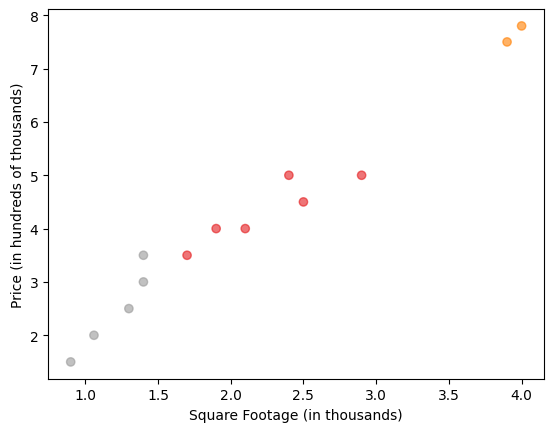

In [40]:
# Add the cluster ID's to the data
data = pd.DataFrame(X, columns = ['sq_ft', 'beds', 'baths', 'price'])
data['cluster'] = cluster_ids

# Plot the data
plt.scatter(data.sq_ft, data.price, c = data.cluster, alpha = 0.6, cmap = 'Set1')
plt.xlabel("Square Footage (in thousands)")
plt.ylabel("Price (in hundreds of thousands)")

What this plot shows us, is we have 3 clusters and this is how their relationship between Square Footage (x-axis) and Price (y-axis) affected their cluster groupings. The Cluster 3, mentioned earlier, would be in the lower lefthand corner.

## What to do next?

Some next steps that can be taken:
- Use the clusters to help develop your understanding about the problem and data.
- Try other clustering algorithms depending on your use case (k-Nearest-Neighbor, k-Medioids, DBSCAN, etc.)
- Normalize your data. It makes learning difficult for the model when you don't scale your data since it could weigh features, that just have higher values naturally, more than others.
- Use the clustering output as input to a supervised model! This works very well when getting to more complex problems.

## Summary

Clustering is an unsupervised machine learning technique, that groups similar data together forming "clusters". These clusters can help explain your data and provide insights. K-Means is one method of clustering, that uses the average or a.k.a. mean to create the cluster centers. There are many other clustering techniques and ways to form the clusters, which will be explained in a future post.

## Bio

Frankie Cancino is a Data Scientist for Mercedes-Benz Research & Development.

### Links
* [Scikit-Learn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
* [LinkedIn](https://www.linkedin.com/in/frankie-cancino/)
* [Twitter](https://twitter.com/frankiecancino)